<a href="https://colab.research.google.com/github/Chasith-Randima/PyTorch_Course/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X :\n {X[:5]}")
print(f"first 5 samples of y :\n {y[:5]} ")

first 5 samples of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y :
 [1 1 1 1 0] 


In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "Label":y})
circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
import matplotlib.pyplot as plt

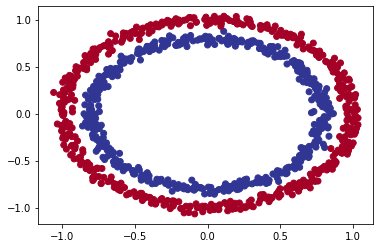

In [ ]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sameple of X :{X_sample} and the same for y :{y_sample}");
print(f"Shapes for one sample of X :{X_sample.shape} and the same for y :{y_sample.shape}")

Values for one sameple of X :[0.75424625 0.23148074] and the same for y :1
Shapes for one sample of X :(2,) and the same for y :()


In [ ]:
import torch
torch.__version__

'1.13.1+cu116'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X),X.dtype,y.dtype,type(y)

(torch.Tensor, torch.float32, torch.float32, torch.Tensor)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size= 0.2,
                                                 random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
from sklearn import datasets
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

    # self.two_linear_layers = nn.Sequential(
    #   nn.Linear(in_features=2,out_features=5),
    #   nn.Linear(in_features=5,out_features=1)
    # )

    def forward(self,x):
      return self.layer_2(self.layer_1(x))
    # def forward(self,x):
    #   return self.two_linear_layers(x)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, shape {X_test.shape}")
print(f"\n First 10 predictions : \n {untrained_preds[:10]}")
print(f"\n First 10 Labels : \n {y_test[:10]}")

Length of predictions : 200, shape: torch.Size([200, 1])
Length of test samples : 200, shape torch.Size([200, 2])

 First 10 predictions : 
 tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853],
        [0.1785],
        [0.2280],
        [0.1960],
        [0.2965],
        [0.3120]])

 First 10 Labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5809],
        [0.5779],
        [0.5725],
        [0.5834],
        [0.5462]])

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

epochs = 1000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # loss = loss_fn(torch.sigmoid(y_logits)) example showing BCELoss expect prediction probability not logits

  loss = loss_fn(y_logits,
                 y_train)
  
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)
    
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f}  , Acc : {acc:.2f}%  Test Loss : {test_loss:.5f} , Test Acc: {test_acc:.2f}% ")


Epoch : 0 | Loss : 0.70175  , Acc : 50.00%  Test Loss : 0.70198 , Test Acc: 50.00% 
Epoch : 10 | Loss : 0.69749  , Acc : 50.00%  Test Loss : 0.69785 , Test Acc: 50.00% 
Epoch : 20 | Loss : 0.69541  , Acc : 50.00%  Test Loss : 0.69580 , Test Acc: 50.00% 
Epoch : 30 | Loss : 0.69438  , Acc : 50.50%  Test Loss : 0.69477 , Test Acc: 50.50% 
Epoch : 40 | Loss : 0.69385  , Acc : 57.38%  Test Loss : 0.69425 , Test Acc: 54.50% 
Epoch : 50 | Loss : 0.69357  , Acc : 53.00%  Test Loss : 0.69397 , Test Acc: 53.00% 
Epoch : 60 | Loss : 0.69341  , Acc : 52.12%  Test Loss : 0.69383 , Test Acc: 54.00% 
Epoch : 70 | Loss : 0.69331  , Acc : 51.38%  Test Loss : 0.69375 , Test Acc: 51.50% 
Epoch : 80 | Loss : 0.69325  , Acc : 51.38%  Test Loss : 0.69371 , Test Acc: 52.00% 
Epoch : 90 | Loss : 0.69320  , Acc : 51.50%  Test Loss : 0.69369 , Test Acc: 51.50% 
Epoch : 100 | Loss : 0.69317  , Acc : 50.88%  Test Loss : 0.69369 , Test Acc: 50.50% 
Epoch : 110 | Loss : 0.69314  , Acc : 51.38%  Test Loss : 0.69369

In [ ]:
device

'cpu'

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists..")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_function.py already exists..


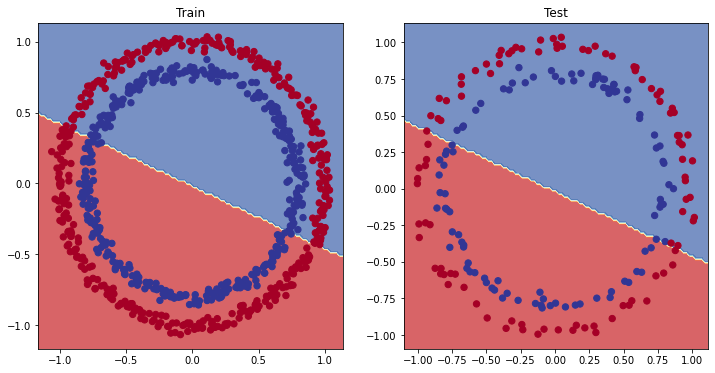

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)

    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, 

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()


optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f} | Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} , Test Acc : {test_acc:.2f}%  " )






Epoch : 0 | Loss : 0.69396 | Acc : 50.88% | Test Loss : 0.69261 , Test Acc : 51.00%  
Epoch : 100 | Loss : 0.69305 | Acc : 50.38% | Test Loss : 0.69379 , Test Acc : 48.00%  
Epoch : 200 | Loss : 0.69299 | Acc : 51.12% | Test Loss : 0.69437 , Test Acc : 46.00%  
Epoch : 300 | Loss : 0.69298 | Acc : 51.62% | Test Loss : 0.69458 , Test Acc : 45.00%  
Epoch : 400 | Loss : 0.69298 | Acc : 51.12% | Test Loss : 0.69465 , Test Acc : 46.00%  
Epoch : 500 | Loss : 0.69298 | Acc : 51.00% | Test Loss : 0.69467 , Test Acc : 46.00%  
Epoch : 600 | Loss : 0.69298 | Acc : 51.00% | Test Loss : 0.69468 , Test Acc : 46.00%  
Epoch : 700 | Loss : 0.69298 | Acc : 51.00% | Test Loss : 0.69468 , Test Acc : 46.00%  
Epoch : 800 | Loss : 0.69298 | Acc : 51.00% | Test Loss : 0.69468 , Test Acc : 46.00%  
Epoch : 900 | Loss : 0.69298 | Acc : 51.00% | Test Loss : 0.69468 , Test Acc : 46.00%  


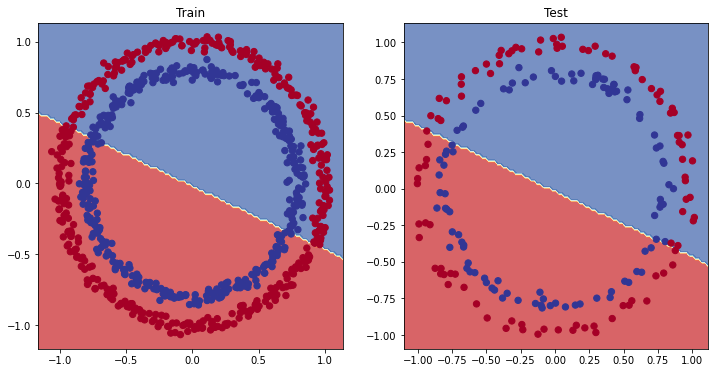

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5],y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8 * len(X_regression))

X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

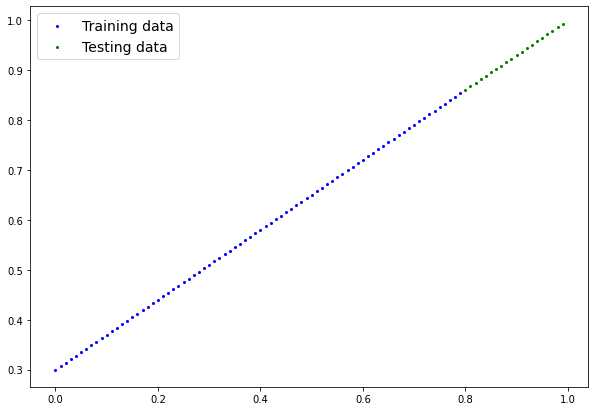

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)


for epoch in range(epochs):
  y_pred = model_2(X_train_regression)

  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f}  | Test Loss : {test_loss:.5f}")

Epoch : 0 | Loss : 0.75986  | Test Loss : 0.91103
Epoch : 100 | Loss : 0.02858  | Test Loss : 0.00081
Epoch : 200 | Loss : 0.02533  | Test Loss : 0.00209
Epoch : 300 | Loss : 0.02137  | Test Loss : 0.00305
Epoch : 400 | Loss : 0.01964  | Test Loss : 0.00341
Epoch : 500 | Loss : 0.01940  | Test Loss : 0.00387
Epoch : 600 | Loss : 0.01903  | Test Loss : 0.00379
Epoch : 700 | Loss : 0.01878  | Test Loss : 0.00381
Epoch : 800 | Loss : 0.01840  | Test Loss : 0.00329
Epoch : 900 | Loss : 0.01798  | Test Loss : 0.00360
Epoch : 1000 | Loss : 0.01782  | Test Loss : 0.00333
Epoch : 1100 | Loss : 0.01674  | Test Loss : 0.00317
Epoch : 1200 | Loss : 0.01640  | Test Loss : 0.00316
Epoch : 1300 | Loss : 0.01648  | Test Loss : 0.00256
Epoch : 1400 | Loss : 0.01648  | Test Loss : 0.00323
Epoch : 1500 | Loss : 0.01632  | Test Loss : 0.00337
Epoch : 1600 | Loss : 0.01597  | Test Loss : 0.00284
Epoch : 1700 | Loss : 0.01458  | Test Loss : 0.00244
Epoch : 1800 | Loss : 0.01532  | Test Loss : 0.00275
Epoch

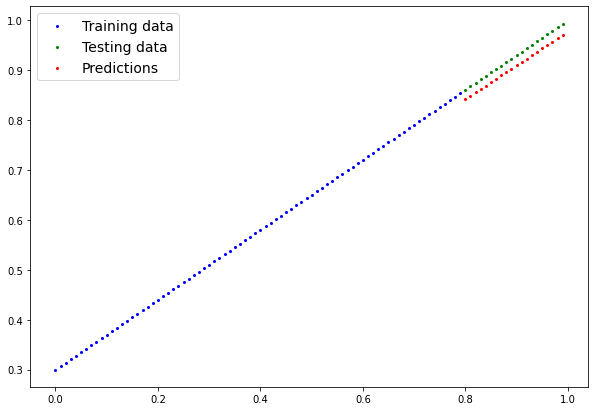

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data = X_test_regression,
                 test_labels=y_test_regression,
                 predictions = y_preds
                 );

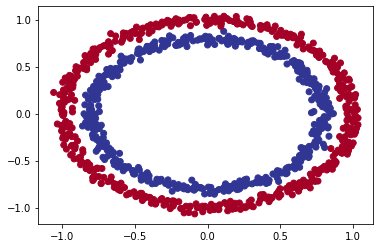

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()


  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    # return self.relu(self.layer_2(self.relu(self.layer_1(x))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch {epoch}  |  Loss : {loss:.4f}  , Accuracy : {acc:.2f}%   | Test Loss : {test_loss:.4f}  | Test Accuracy : {test_acc:.2f}% ")

Epoch 0  |  Loss : 0.6929  , Accuracy : 50.00%   | Test Loss : 0.6932  | Test Accuracy : 50.00% 
Epoch 100  |  Loss : 0.6912  , Accuracy : 52.88%   | Test Loss : 0.6910  | Test Accuracy : 52.50% 
Epoch 200  |  Loss : 0.6898  , Accuracy : 53.37%   | Test Loss : 0.6894  | Test Accuracy : 55.00% 
Epoch 300  |  Loss : 0.6879  , Accuracy : 53.00%   | Test Loss : 0.6872  | Test Accuracy : 56.00% 
Epoch 400  |  Loss : 0.6852  , Accuracy : 52.75%   | Test Loss : 0.6841  | Test Accuracy : 56.50% 
Epoch 500  |  Loss : 0.6810  , Accuracy : 52.75%   | Test Loss : 0.6794  | Test Accuracy : 56.50% 
Epoch 600  |  Loss : 0.6751  , Accuracy : 54.50%   | Test Loss : 0.6729  | Test Accuracy : 56.00% 
Epoch 700  |  Loss : 0.6666  , Accuracy : 58.38%   | Test Loss : 0.6632  | Test Accuracy : 59.00% 
Epoch 800  |  Loss : 0.6516  , Accuracy : 64.00%   | Test Loss : 0.6476  | Test Accuracy : 67.50% 
Epoch 900  |  Loss : 0.6236  , Accuracy : 74.00%   | Test Loss : 0.6215  | Test Accuracy : 79.00% 
Epoch 1000  

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

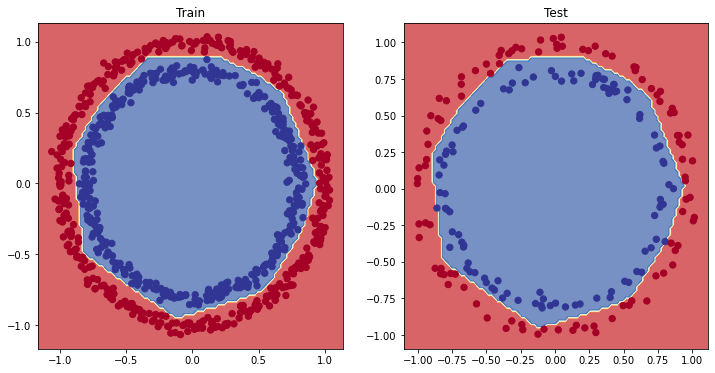

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [ ]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype


torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

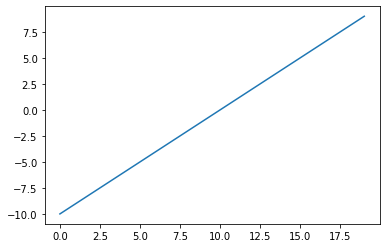

In [ ]:
plt.plot(A)

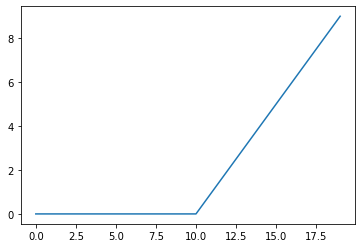

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

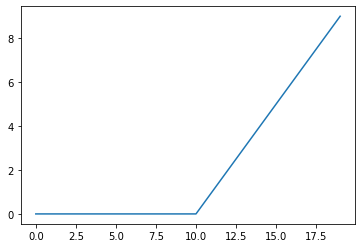

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

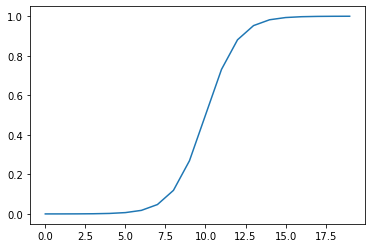

In [ ]:
plt.plot(sigmoid(A))

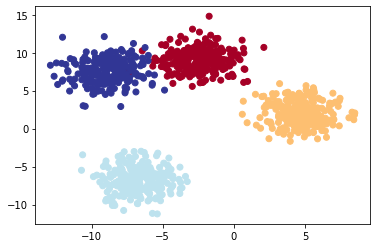

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                     y_blob,
                                                                     test_size=0.2,
                                                                     random_state=RANDOM_SEED)

plt.plot(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu);

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """ Initialize Multiclass Classification Model

    Args:
      input_features (int):Number of input features to the model
      output_features (int):Number of output features (number of output classes)
      hidden_units (int):Number of hidden units between layers default is 8

      Returns:

      Example:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:10])
print(y_pred_probs[:10])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]])


In [ ]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)
    
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} | Accuracy : {acc:.2f}%  Test Loss : {test_loss:.4f} , Test Acc : {test_acc:.2f}%")

Epoch : 0 | Loss : 1.1588 | Accuracy : 40.38%  Test Loss : 1.0755 , Test Acc : 48.00%
Epoch : 10 | Loss : 0.6448 | Accuracy : 96.75%  Test Loss : 0.6607 , Test Acc : 97.50%
Epoch : 20 | Loss : 0.4254 | Accuracy : 98.50%  Test Loss : 0.4307 , Test Acc : 100.00%
Epoch : 30 | Loss : 0.2529 | Accuracy : 99.12%  Test Loss : 0.2451 , Test Acc : 99.50%
Epoch : 40 | Loss : 0.1123 | Accuracy : 99.25%  Test Loss : 0.1023 , Test Acc : 99.50%
Epoch : 50 | Loss : 0.0663 | Accuracy : 99.25%  Test Loss : 0.0585 , Test Acc : 99.50%
Epoch : 60 | Loss : 0.0507 | Accuracy : 99.25%  Test Loss : 0.0429 , Test Acc : 99.50%
Epoch : 70 | Loss : 0.0430 | Accuracy : 99.25%  Test Loss : 0.0349 , Test Acc : 99.50%
Epoch : 80 | Loss : 0.0384 | Accuracy : 99.25%  Test Loss : 0.0299 , Test Acc : 99.50%
Epoch : 90 | Loss : 0.0352 | Accuracy : 99.25%  Test Loss : 0.0266 , Test Acc : 99.50%


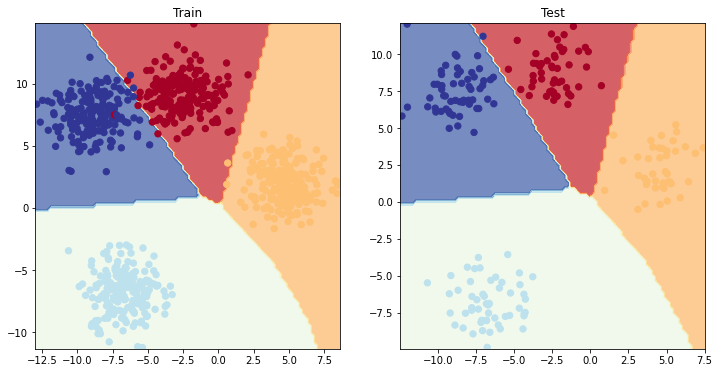

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 15.6 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetrics_accuracy(test_preds,y_blob_test)

tensor(0.9950)